# TikTok Post Data Analysis

# Practical Motivation
Social Media Marketing is digital marketing using social media to build a company's brand, increase sales, and expand reach. In early 2023, there were 4.76 billion social media users which make up over 59% of the world's population, thus revolutionizing the way businesses connect with their target audience. Among many platforms, Tiktok in particular has become one of the most popular, with over 500 million users. With a large pool of customers who are also highly engaged and spend significant amounts of time on the app, Tiktok hence offers businesses significant marketing potential to build brand awareness, engage with customers, and drive sales.

With approximately 93.79% of businesses utilising social media, it is imperative that businesses know how to create effective Tiktok posts that reach and capture a large proportion of their target audience and engage them. High engagement can lead to increased conversions, and higher revenue. Thus, this requires an analysis of Tiktok post performance and engagement metrics to refine social media marketing strategy.

### Problem Formulation
For our project, we identify 'Likes' as the factor of engagement of social media post to be analysed. A like is a passive response from a user which signals approval or interest in the social media content. This interaction indicates visibility and can help a post to show up in more user's feeds. By focusing on driving engagement and sales through likes, we can thus optimise the social media marketing strategy to better resonate with the targeted customers and improve engagement.

### Problem Statement
Hence, through this project, we seek to analyse: *How do factors surrounding the posting details affect engagement of a Tiktok post?*

# Data Loading

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [3]:
# Load the dataset
initial_df = pd.read_csv('TikTok - Posts.csv')

In [4]:
# Display the first few rows
print("\nFirst few rows:")
print(initial_df.head())

# Display basic information about the dataset
print("Dataset Info:")
print(initial_df.info())

print("\nData type : ", type(initial_df))
print("\nDataset dimensions:", initial_df.shape)


First few rows:
                                                 url              post_id  \
0  https://www.tiktok.com/@chawookiii/video/74840...  7484046285801147654   
1  https://www.tiktok.com/@chrissysmalls_/video/7...  7483259059383160110   
2  https://www.tiktok.com/@learottstegge/video/74...  7483943860075269378   
3  https://www.tiktok.com/@mativilela/video/74838...  7483861671618907414   
4  https://www.tiktok.com/@vanilla_swirlxx/video/...  7484076237716049207   

                                         description  \
0  pre release eps-11 🤣😂 #mydearestnemesis #kdram...   
1  Pop up Queen frfr 👑 omggg I've been to some re...   
2  EXCUSE me? Liebs! @Charlotte Tilbury 🥹🫶🏻#makeu...   
3  Outfit check 💼 #outfitcheck #outfitinspo #outf...   
4  Replying to @illi.ramirez  DAY 75 of 75 HARD O...   

                create_time  digg_count  share_count  collect_count  \
0  2025-03-21T00:02:03.000Z        1128         26.0             67   
1  2025-03-18T21:07:38.000Z          10  

Number of rows: 1000

Number of columns: 37
- 3 Boolean vaariables
- 12 Numeric variables
- 22 Categorical variables

The 37 columns are too many for us to analyse and are not useful for our analysis. We are keen to analyse factors surrounding posting details such as create_time and video_duration whereas factors such as video_url and preview_image is irrelevant to our data analysis. Thus, we create a DataFrame consisting only of data that could be useful for our project. For this DataFrame, we keep the following columns: create_time, digg_count, share_count, collect_count, comment_count, play_count, video_duration, is_verified, and profile_followers. 

In [5]:
#Creation of DataFrame to be used for the rest of the notebook, where unused columns are removed
df = pd.DataFrame(initial_df[["create_time", "digg_count","play_count", "video_duration", "is_verified", "profile_followers"]])

# Exploratory Data Analysis

### Data Overview and Basic Statistics

In [6]:
#Some basic statistics for numeric variables
print("Basic Statistics:")
print(df.describe())

Basic Statistics:
         digg_count    play_count  video_duration  profile_followers
count  1.000000e+03  1.000000e+03     1000.000000       1.000000e+03
mean   5.821264e+05  5.704489e+06       35.124000       3.196867e+07
std    1.156071e+06  1.275803e+07       50.035429       3.880058e+07
min    0.000000e+00  1.800000e+01        5.000000       0.000000e+00
25%    3.370000e+02  9.109750e+03       12.000000       1.210000e+04
50%    3.370000e+04  3.721000e+05       17.000000       3.764000e+05
75%    6.451000e+05  6.325000e+06       40.000000       7.720000e+07
max    1.110000e+07  1.828000e+08      600.000000       9.400000e+07


All the numeric variables show a wide range as seen in the large difference between the min and max values. This indicates that the dataset has a high degree of variability. 


In [7]:
#Some basic statistics for categorical predictors
df[['is_verified']].describe()

,is_verified
count,1000
unique,2
top,False
freq,555


is_verified is a Boolean data type, indicating True or False for whether or not the Tiktok post was created by a verified account. 

## Distribution Analysis

<Axes: xlabel='digg_count'>

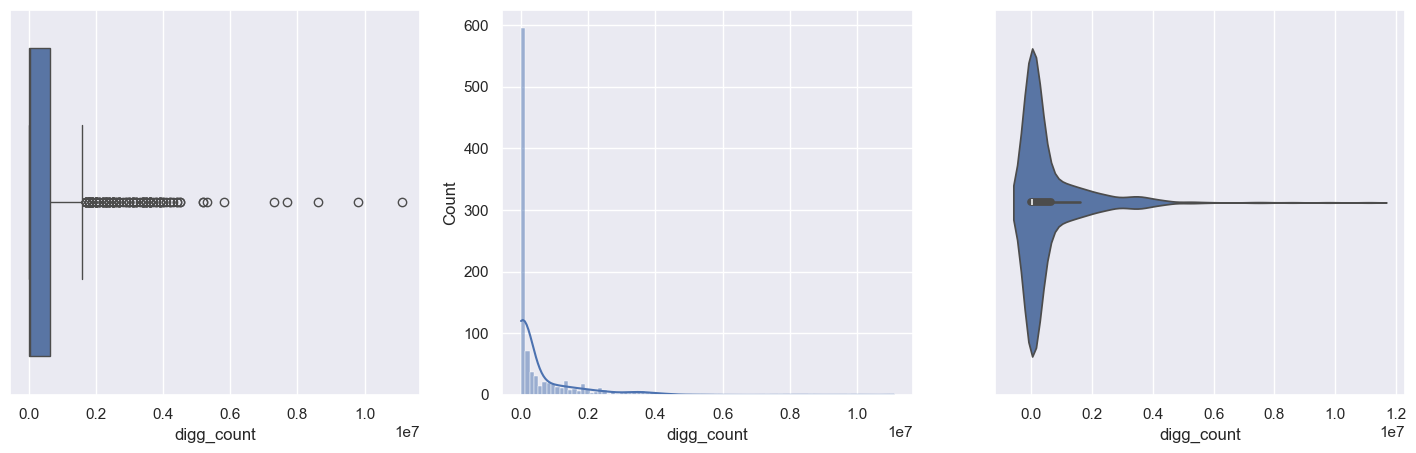

In [8]:
#Display of Boxplot, Histogram, and Violin Plot to visualise the distribution of the response variable

f, axes = plt.subplots(1,3, figsize=(18, 5))

sb.boxplot(x = 'digg_count', data = df, ax = axes[0])
sb.histplot(x = 'digg_count', data = df, kde=True, ax = axes[1])
sb.violinplot(x = 'digg_count', data = df,ax = axes[2])


The visualisations show that digg_count is strongly skewed to the right, with majority of the data points concentrated towards the lower end of digg_count. 
The box plot shows that the larger values of the digg_count are spread out over a wide range with many outliers, which indicates that there are videos with exceptionally higher digg_count as compared to other videos. This is unsurprising given the nature of social media posts, especially for Tiktok, with the phenomenon of viral videos which garner significantly higher likes.

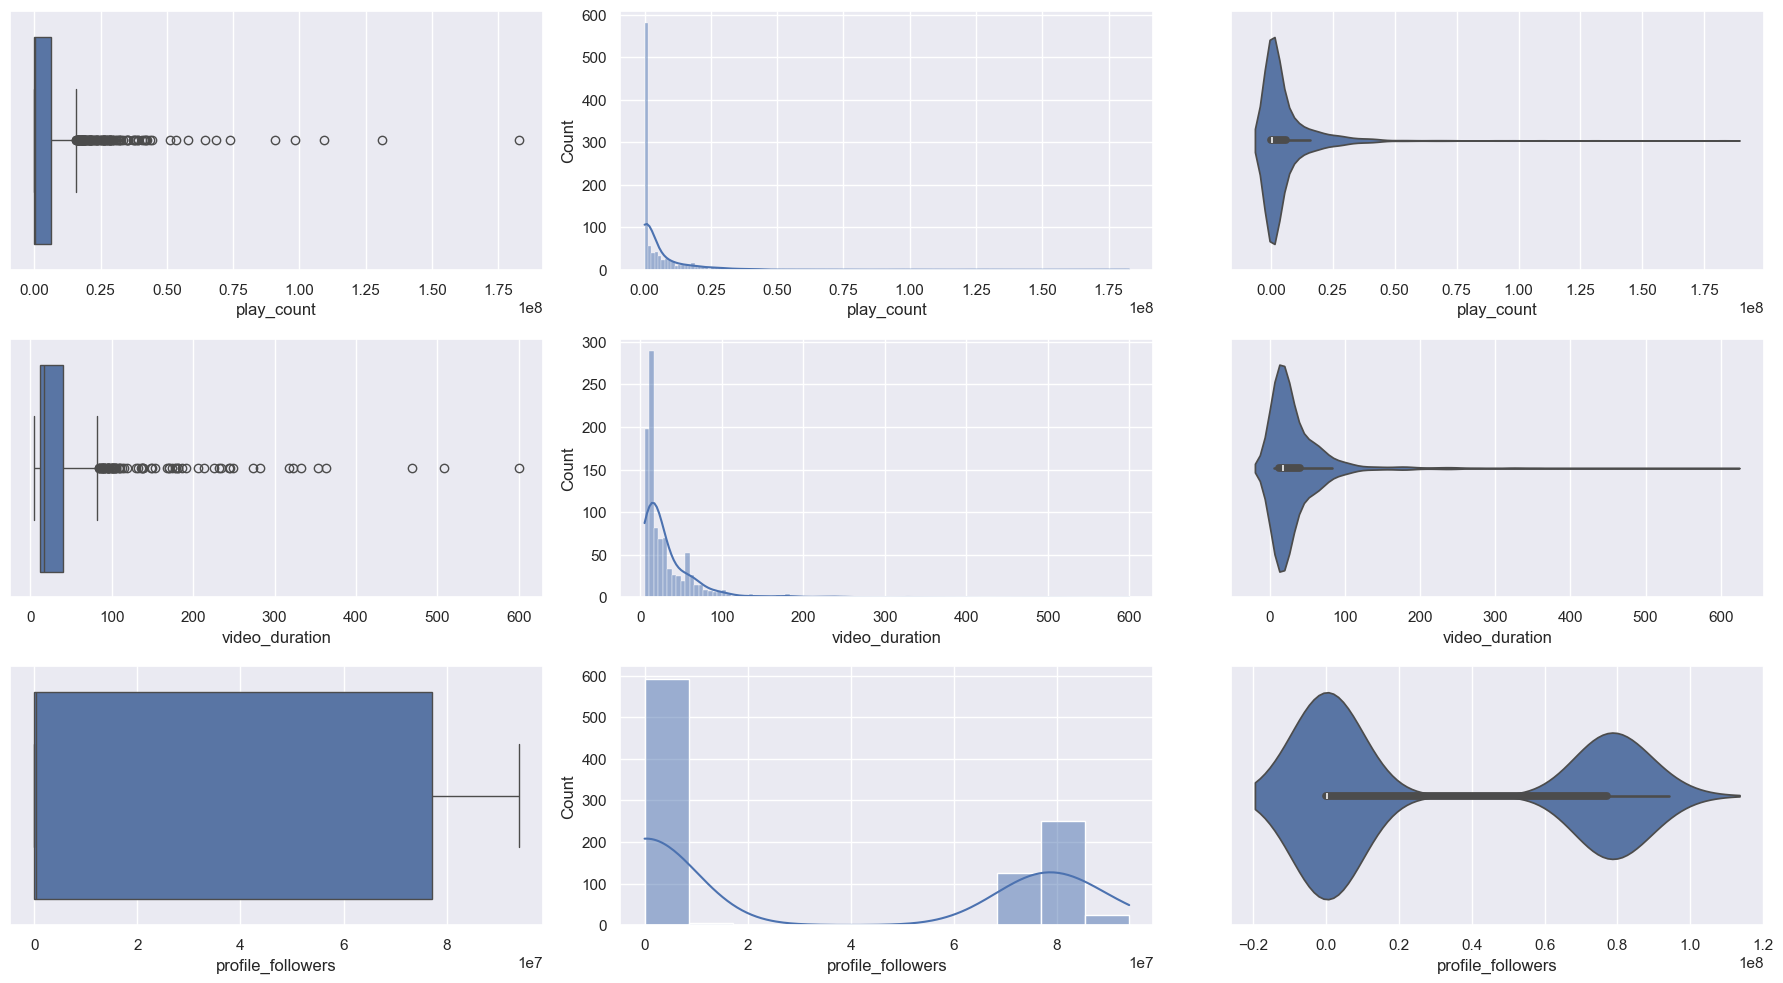

In [9]:
#Display of Boxplot, Histogram, and Violin Plot to visualise the distribution of numeric predictors
numeric_cols = df.select_dtypes(include=[np.number]).drop(columns=['digg_count']).columns

f, axes = plt.subplots(3, 3, figsize=(18, 10))

count = 0

for var in numeric_cols:
    sb.boxplot(data = df[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = df[var], kde=True, ax = axes[count,1])
    sb.violinplot(data = df[var], orient = "h", ax = axes[count,2])
    count += 1

plt.tight_layout()
plt.show()

Both video_duration and play_count have a strong right skew with some video achieving higher play counts and are of longer duration. 
Generally, most videos have lower play counts and are of shorter durations. Both variables also show a number of outliers. 

profile_followers show a bimodal distribution with 2 peaks in the distribution, a very high peak at a low follower count and a second peak that is smaller at a higher follower count.
The violin plot also shows the bimodal distribution with through the 2 areas of higher density. Hence, there exists 2 distinct populations within profile_followers.

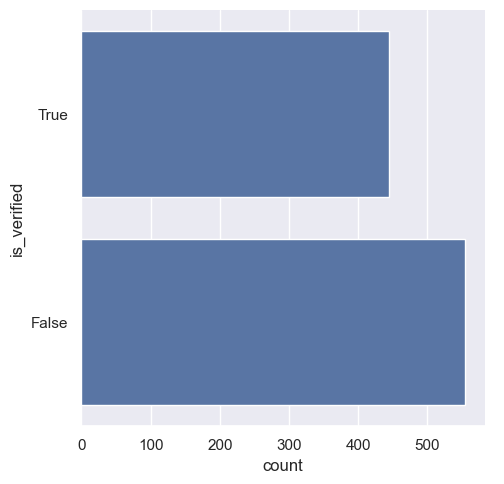

In [30]:
#Display of Catplot to visualise the distribution of categorical predictors
sb.catplot(y = 'is_verified', data = df, kind = "count", order =  ['True', 'False'])

The catplot shows that there is roughly 100 more posts made by non-verified profiles as compared to verified profiles. Within a dataset with 1000 rows, the slight imbalance is insignificant to us

## Correlation Analysis of Relationship with Like Count [Numeric Predictors]

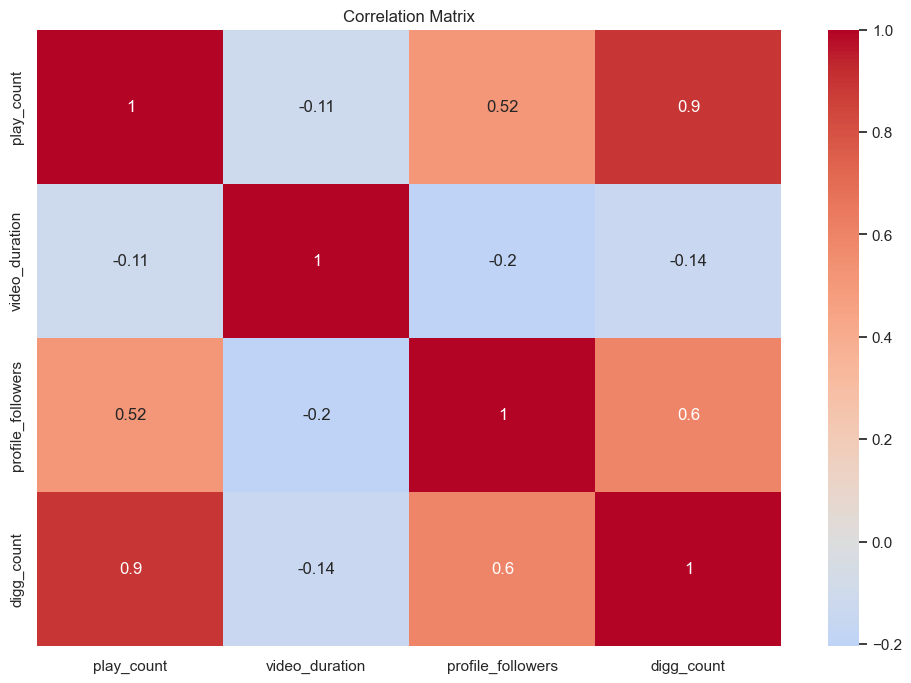

In [11]:
# Heatmap of Correlation matrix
plt.figure(figsize=(12, 8))

columns_to_plot = list(numeric_cols) + ['digg_count']

sb.heatmap(df[columns_to_plot].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

For correlation with digg_count, play_count has the strongest correlation of 0.9 followed by profile_followers with a moderate correlation of 0.6. Thus, we will be using play_count and profile_followers as predictors. The correlation of video_duration and digg_count of -0.14 shows a very weak linear correlation and may also suggests that they may have a non-linear relationship instead. But with a high variance of video_duration, we will further analyse this correlation by categorising the different values of video_duration.

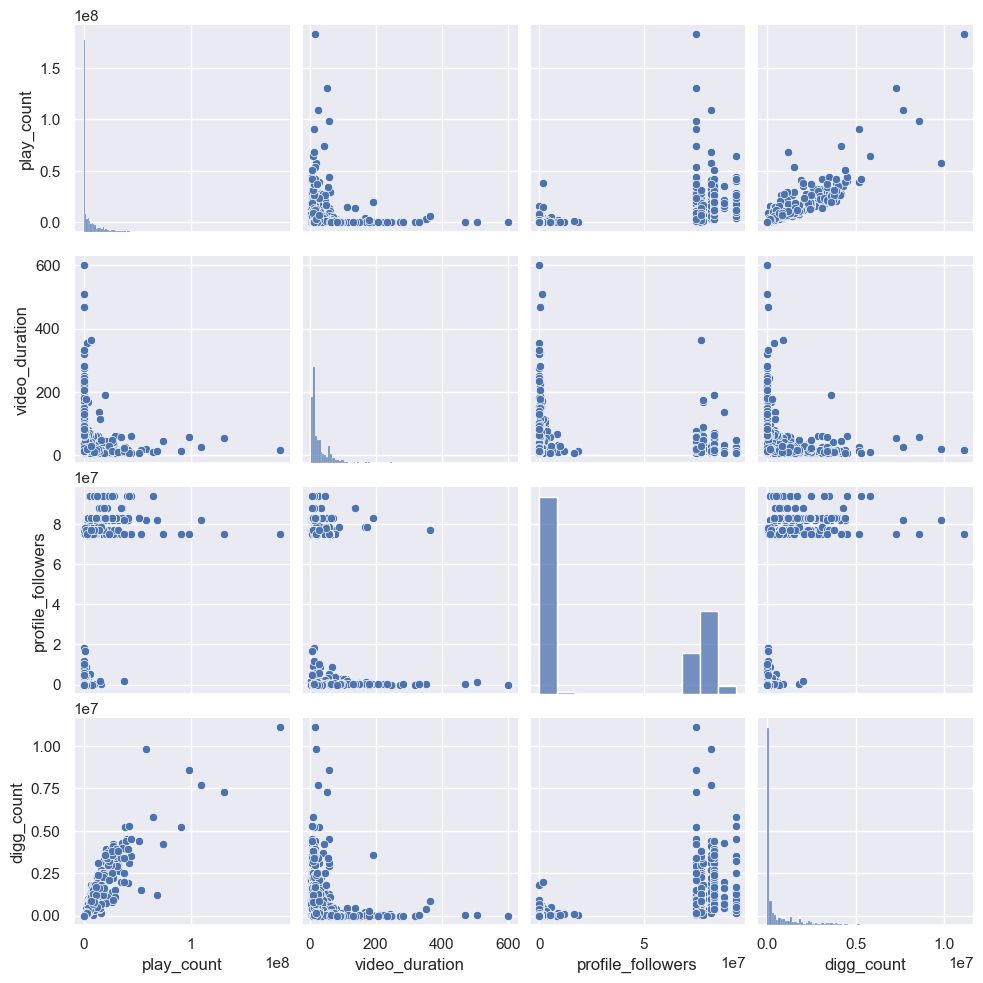

In [12]:
# Draw pairs of variables against one another
sb.pairplot(data = df[columns_to_plot])

## Analysis of Relationship with Like Count [Categorical Predictors]

To further analyse details surrounding the posting details, we would like to analyse the day of post

                  Timestamp   Weekday
0 2025-03-21 00:02:03+00:00    Friday
1 2025-03-18 21:07:38+00:00   Tuesday
2 2025-03-20 17:24:29+00:00  Thursday
3 2025-03-20 12:05:35+00:00  Thursday
4 2025-03-21 01:58:17+00:00    Friday


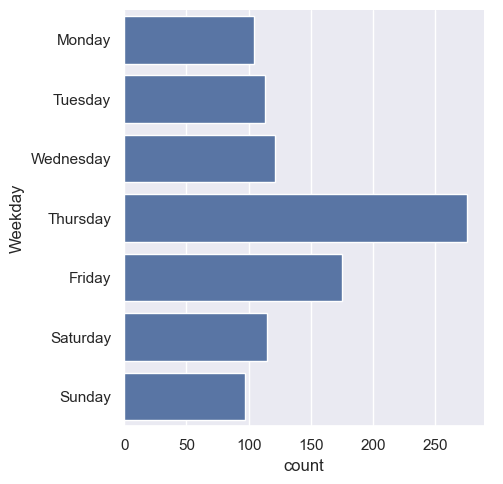

In [13]:
# Creating Weekday column from timestamp
df['Timestamp'] = pd.to_datetime(df['create_time'])
df['Weekday'] = df['Timestamp'].dt.day_name()

print(df[['Timestamp', 'Weekday']].head())
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sb.catplot(y = 'Weekday', data = df, kind = "count",order=weekday_order)

The catplot shows that the number of posts made on each day is roughly the same at around 100 posts except for Thursday which had the highest number of posts made of more than 250 posts and Friday at close to 175 posts made. 

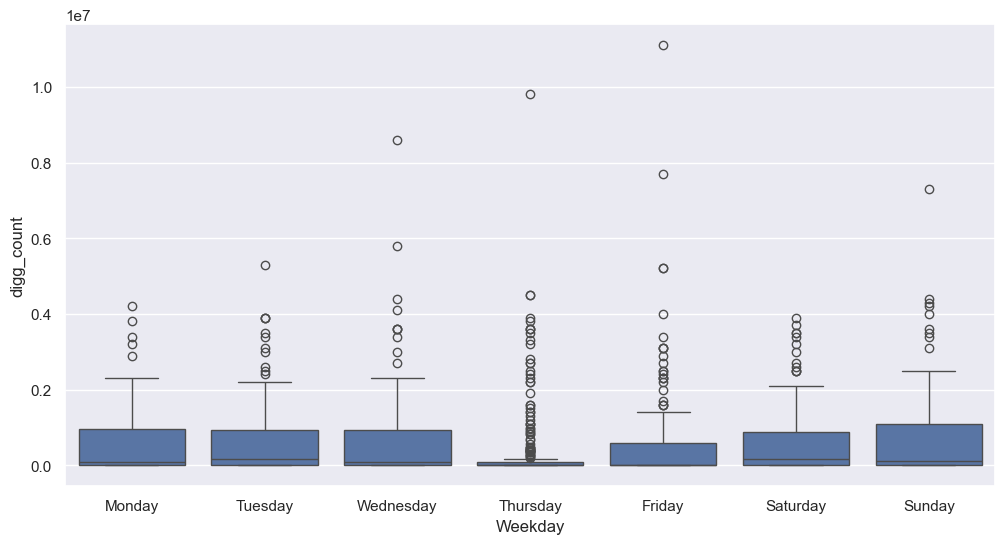

In [14]:
# Day vs Like Count

plt.figure(figsize=(12, 6))
sb.boxplot(x='Weekday', y='digg_count', order=weekday_order, data=df)
plt.show()

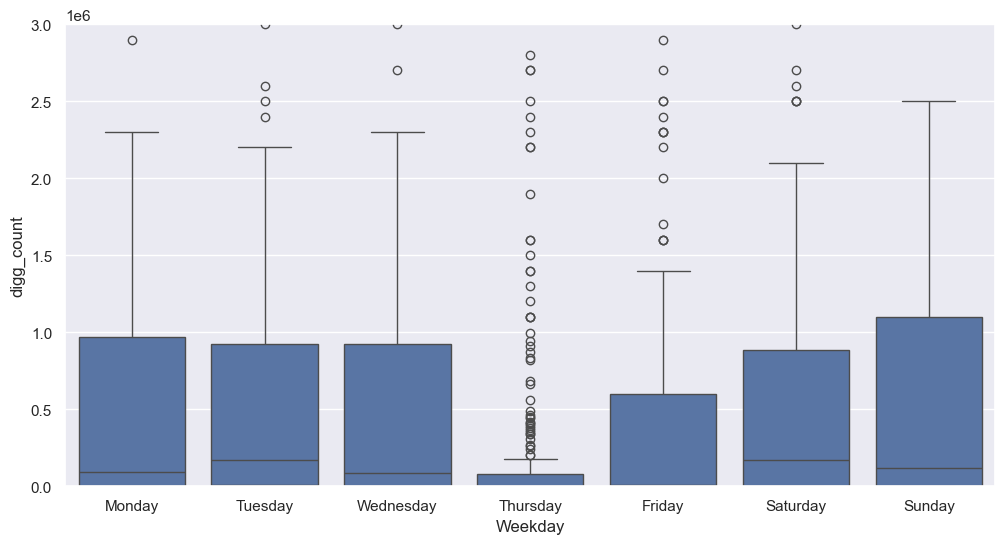

In [15]:
#Limiting values of digg_count to have a clearer video of distribution of the boxplot

plt.figure(figsize=(12, 6))
sb.boxplot(x='Weekday', y='digg_count', order=weekday_order, data=df)
plt.ylim(0, 0.3e7)
plt.show()

The median of digg_count across the different days appear relatively consistent, with a noticable significant decrease in digg_count for Thursday and a lower median for Friday. Saturday appears to have the highest median, and Sunday has a longer boxplot indicating greater variability of digg_count.  

Eventhough the catplot shows that most of the posts were made on Thursday in the dataset, on average, posts on Thursday had the least number digg_count. Whereas Sunday has the least number of posts made but has the highest number of digg_count. While the average like count per day for the rest of the week is roughly the same, this shows that the day which posts were made does have some effect on the number of likes received. Thus we will be examining this as a factor of predicting engagement. 

   video_duration Duration Category
0              85              Long
1              18            Medium
2              12             Short
3              16             Short
4              70              Long

Video Durations: 
Very Short: less than 12.0
Short: 12.0 to less than 17.0
Medium: 17.0 to less than 40.0
Long: 40.0 and above


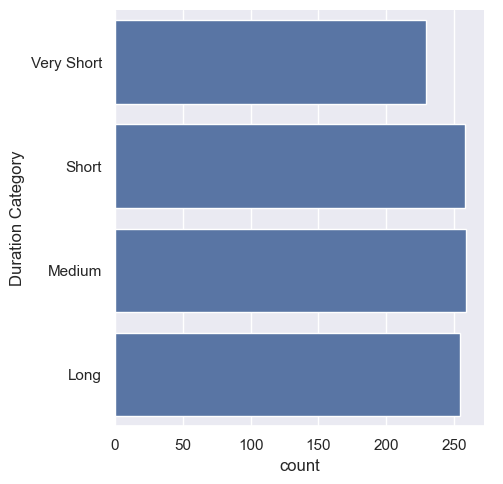

In [16]:
#Categorising video duration to have a more pourposeful analysis as to whether a long or short video length matters in engagement

q1, q2, q3 = df['video_duration'].quantile([0.25, 0.5, 0.75])

df['Duration Category'] = None

for index, row in df.iterrows():
    if row['video_duration'] < q1:
        df.at[index, 'Duration Category'] = 'Very Short'
    elif q1 <= row['video_duration'] < q2 :
        df.at[index, 'Duration Category'] = 'Short'
    elif q2 <= row['video_duration'] < q3 :
        df.at[index, 'Duration Category'] = 'Medium'
    else:
        df.at[index, 'Duration Category'] = 'Long'

print(df[['video_duration', 'Duration Category']].head())

print("\nVideo Durations: ")
print(f"Very Short: less than {q1}")
print(f"Short: {q1} to less than {q2}")
print(f"Medium: {q2} to less than {q3}")
print(f"Long: {q3} and above")

sb.catplot(y = 'Duration Category', data = df, kind = "count", order=['Very Short', 'Short', 'Medium', 'Long'])


The catplot shows that the number of posts made for each duration category are roughly the same at around 250 posts made for each category. Thus, we consider that the distribution for this category is balanced. 

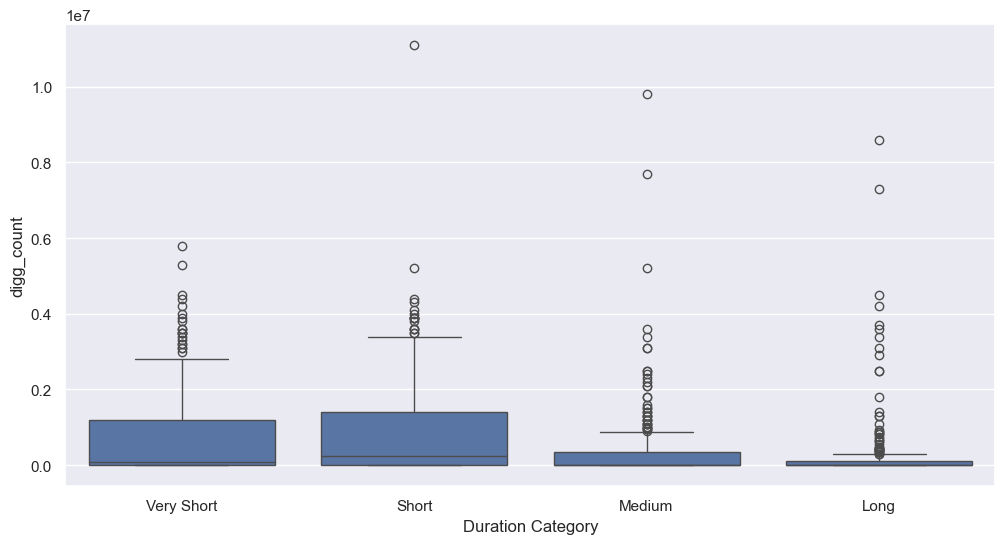

In [17]:
# Video Duration vs Like Count

plt.figure(figsize=(12, 6))
sb.boxplot(x='Duration Category', y='digg_count', order=['Very Short', 'Short', 'Medium', 'Long'],data=df)
plt.show()

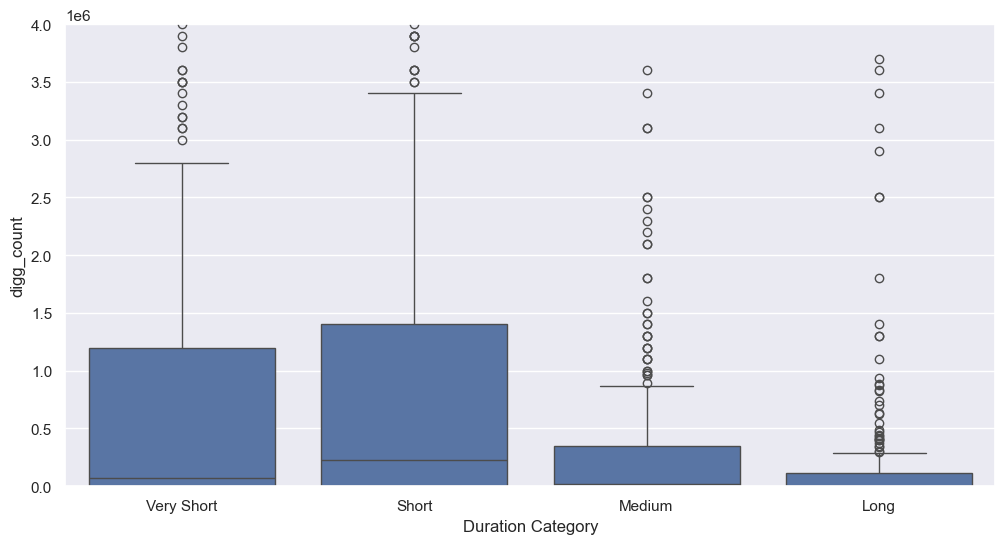

In [18]:
#Limiting values of digg_count to have a clearer video of distribution of the boxplot

plt.figure(figsize=(12, 6))
sb.boxplot(x='Duration Category', y='digg_count', order=['Very Short', 'Short', 'Medium', 'Long'],data=df)
plt.ylim(0, 0.4e7)
plt.show()

The box plots show that posts that are very short and short in duration have a noticeably higher median than posts that are of medium and long duration. The longer boxplots of very short and short duration category as compared to medium and long shows that medium and long duration of posts tend to generated a concentrated range of digg_count that are lower than very short and short videos. Thus, shorter duration videos tend to receive more engagement.

   profile_followers Followers Category
0              70100                Low
1               1105           Very Low
2               4654           Very Low
3               1771           Very Low
4            1000000             Medium

Range of followers: 
Very Low: less than 12100.0
Low: 12100.0 to less than 376400.0
Medium: 376400.0 to less than 77200000.0
High: 77200000.0 and above


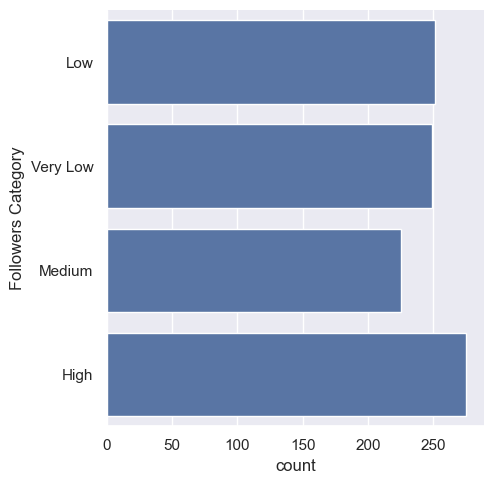

In [19]:
#Categorising profile_followers to have a more purposeful analysis as to whether an account with many followers or little followers matters in engagement

q1, q2, q3 = df['profile_followers'].quantile([0.25, 0.5, 0.75])

df['Followers Category'] = None

for index, row in df.iterrows():
    if row['profile_followers'] < q1:
        df.at[index, 'Followers Category'] = 'Very Low'
    elif q1 <= row['profile_followers'] < q2 :
        df.at[index, 'Followers Category'] = 'Low'
    elif q2 <= row['profile_followers'] < q3 :
        df.at[index, 'Followers Category'] = 'Medium'
    else:
        df.at[index, 'Followers Category'] = 'High'

print(df[['profile_followers', 'Followers Category']].head())

print("\nRange of followers: ")
print(f"Very Low: less than {q1}")
print(f"Low: {q1} to less than {q2}")
print(f"Medium: {q2} to less than {q3}")
print(f"High: {q3} and above")

sb.catplot(y = 'Followers Category', data = df, kind = "count")

The categorisation of profile_followers provided us with a clearer picture of how profile_followers affect engagement. The catplot shows that the number of posts made by each follower category is roughly the same at around 200-250 posts for each category. Yet, as seen from the box plots, below generally, higher followers category result in a higher like count. Thus, we will be considering profile_followers as a factor for predicting like count. 


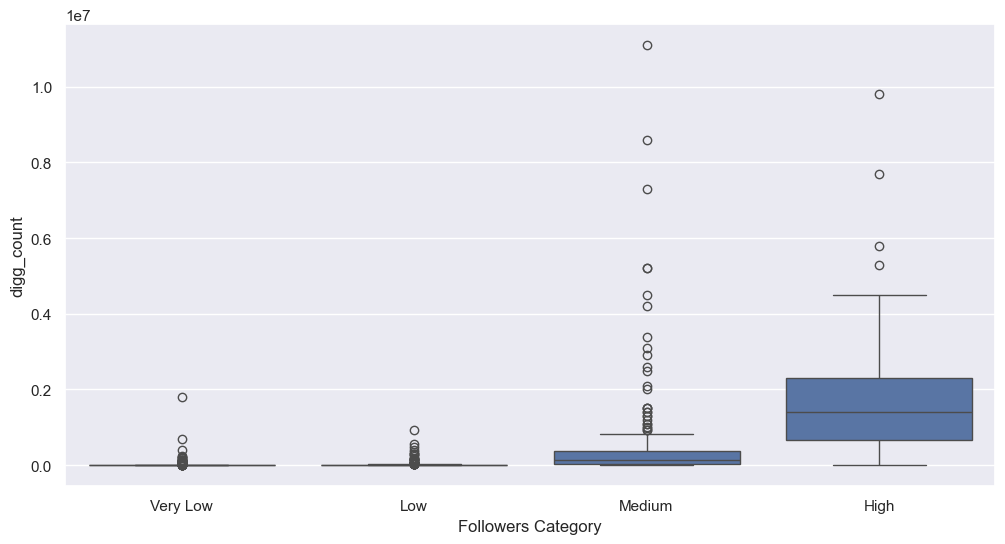

In [20]:
# Followers vs Like Count

plt.figure(figsize=(12, 6))
sb.boxplot(x='Followers Category', y='digg_count', order=['Very Low', 'Low', 'Medium', 'High'], data=df)
plt.show()

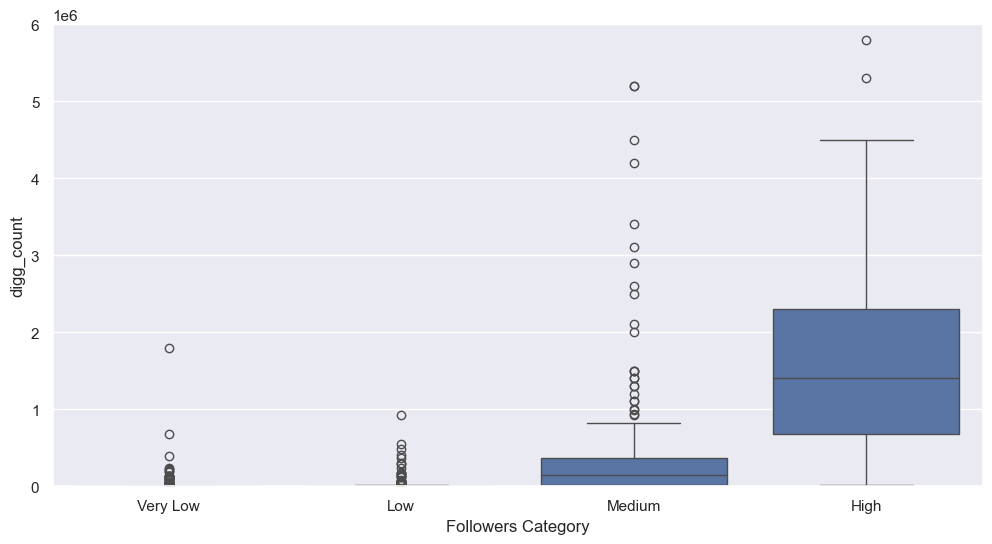

In [21]:
#Limiting values of digg_count to have a clearer video of distribution of the boxplot

plt.figure(figsize=(12, 6))
sb.boxplot(x='Followers Category', y='digg_count', order=['Very Low', 'Low', 'Medium', 'High'],data=df)
plt.ylim(0, 0.6e7)
plt.show()

The boxplots show separate distributions of boxplot for the different categories. As the followers category increases, digg_count thus increases as well. Critically, accounts with low and very low followers category have significantly lower digg_count, thus this is an important factor which affects engagement. 

    Weekday Weekday Type
0    Friday      Weekday
1   Tuesday      Weekday
2  Thursday      Weekday
3  Thursday      Weekday
4    Friday      Weekday


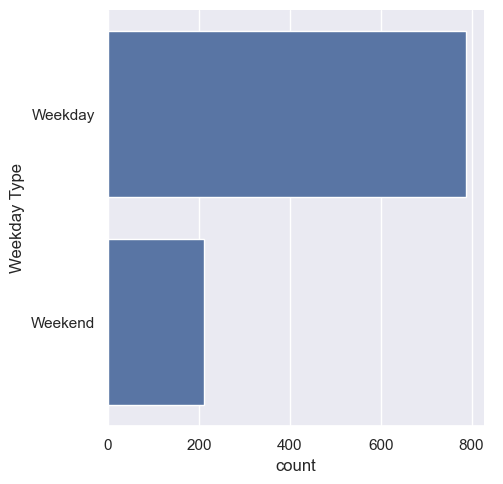

In [22]:
# Categorising the type of day into Weekend and Weekday to analyse if Weekday Type affects engagement
df['Weekday Type'] = None

for index, row in df.iterrows():
    if row['Weekday'] in ['Saturday', 'Sunday'] :
        df.at[index, 'Weekday Type'] = 'Weekend'
    else:
        df.at[index, 'Weekday Type'] = 'Weekday'

print(df[['Weekday', 'Weekday Type']].head())

sb.catplot(y = 'Weekday Type', data = df, kind = "count")

The catplot shows that significantly more posts were made on a weekday than a weekend, hence the distribution is unbalanced. 

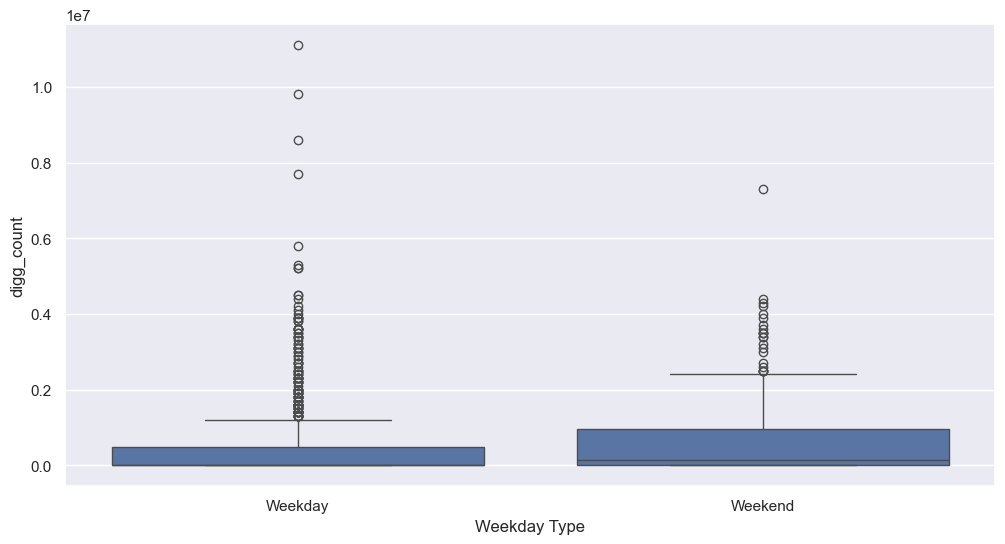

In [23]:
# Weekday Type vs Like Count

plt.figure(figsize=(12, 6))
sb.boxplot(x='Weekday Type', y='digg_count', data=df)
plt.show()

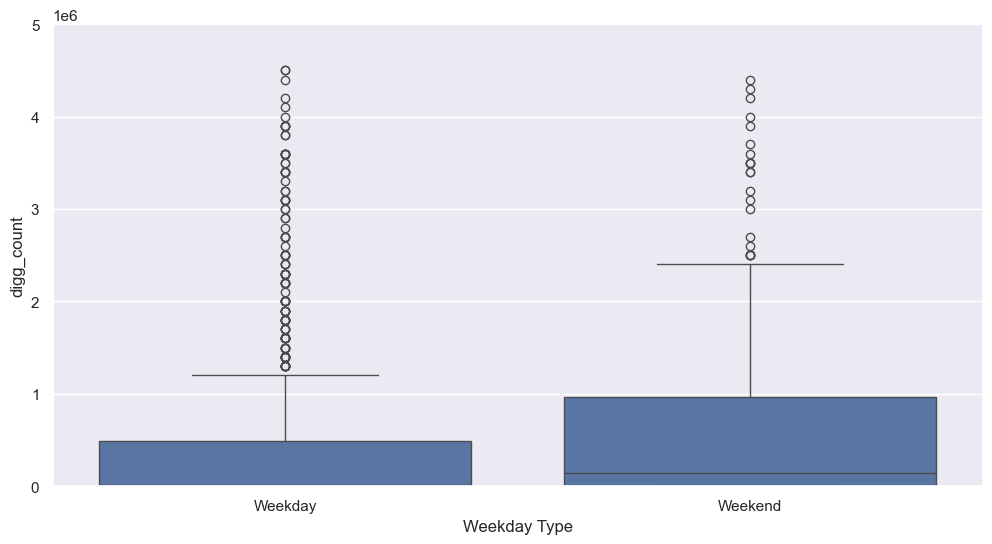

In [24]:
#Limiting values of digg_count to have a clearer video of distribution of the boxplot

plt.figure(figsize=(12, 6))
sb.boxplot(x='Weekday Type', y='digg_count', data=df)
plt.ylim(0, 0.5e7)
plt.show()


The box plot shows that the median digg_count for weekend is slightly higher than the median for weekday. The upper whisker for weekends is also longer than the upper whisker for weekdays, indicating that posts made on a weekend have a wider spread than posts made on a weekday. Thus, while their central tendency are roughly the same, weekends exhibit a slightly higher engagement. 

Nevertheless, we feel that it is more beneficial to analyse the specific day of posting rather than whether it is a weekday or a weekend. 


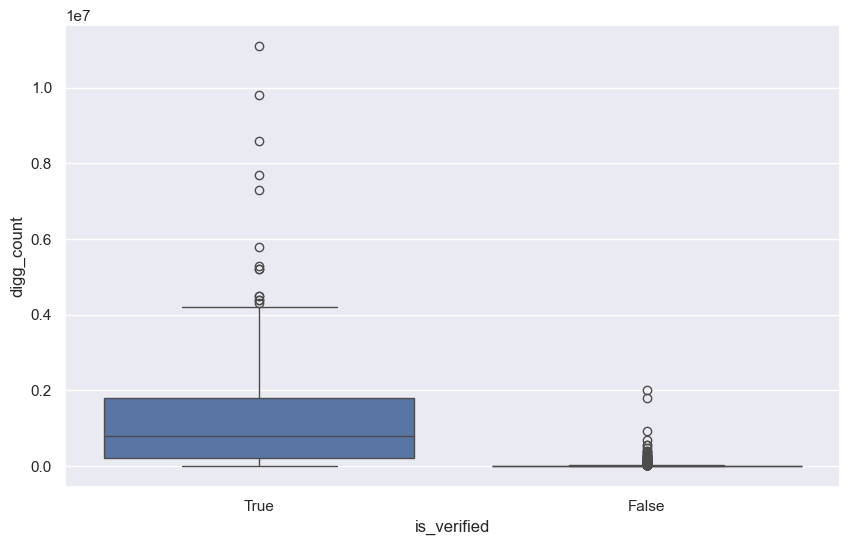

In [28]:
# is_Verified vs Like Count

plt.figure(figsize=(10, 6))
sb.boxplot(x='is_verified', y='digg_count', data=df, order =['True', 'False'])
plt.show()

The boxplot shows that generally, verified accounts have higher digg_count for their posts as compared to non-verified profiles. The extremely narrow boxplot for non-verified profiles show that the difference in digg_count is significant, hence is_verified plays an important role in affecting digg_count.

## Key Findings and Insights

1. **Dataset Overview**:
   - The raw dataset contains 1000 rows
   - Useful categorical variables include is_verified, duration_category and weekday
   - Many irrelevant columns are dropped 


2. **Some Patterns**:
   - Verified accounts tend to have higher engagement
   - Video duration when categorised shows a correlation with engagement
   - Specific days of posting show a higher engagement (Sunday) , other specific days (Thursday) have significantly lower engagement
   - Higher play count tend to have higher engagement
   - Higher profile followers tend to have higher engagement


3. **Correlation Analysis**:
   - Strong positive correlation between play_count and digg_count
   - Moderate positive correlation between profile_followers and digg_count
   - Week correlation between video_duration and digg_count but when we categorise video_duration, there is a positive relationship seen


4. **Columns to be used as factors for our prediction**

   - is_verified
   - weekday
   - video_duration
   - profile_followers
   - play_count


## Data Cleaning

### 1. Handle Missing Values

In [69]:
# Creating a copy of the Dataset
df_clean = df.copy()

# Check for missing values
missing_values = df_clean.isnull().sum()
print("Missing values before cleaning:")
print(missing_values[missing_values > 0])

# Handle missing values based on data type and context
for col in df_clean.columns:
    if df_clean[col].dtype in ['int64', 'float64']:
        # Fill numerical missing values with median
        df_clean[col] = df_clean[col].fillna(df_clean[col].median())
    elif df_clean[col].dtype == 'object':
        # Fill categorical missing values with mode
        df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])

print("\nMissing values after cleaning:")
print(df_clean.isnull().sum())

Missing values before cleaning:
Series([], dtype: int64)

Missing values after cleaning:
create_time           0
digg_count            0
play_count            0
video_duration        0
is_verified           0
profile_followers     0
Timestamp             0
Weekday               0
Duration Category     0
Followers Category    0
Weekday Type          0
dtype: int64


### 2. Handle Outliers

To preserve the data set with real values, we do not remove outliers. Given the context of social media posts, we do expect a significant number of outliers as posts generally vary in engagement and the different factors involved. For example, some videos in the dataset may be viral videos which have significantly higher like count and play count. If we remove the outiers, we may lose valuable information on how such factors affect enagagement.


### 3. Clean and Transform Variables

In [70]:
# Convert categorical columns to proper type
categorical_cols = ['Weekday Type', 'Followers Category', 'Duration Category','Weekday','is_verified']

for col in categorical_cols:
    if col == 'is_verified':
        df_clean['is_verified'] = df_clean['is_verified'].astype(bool)
    else:
        df_clean[col] = df_clean[col].astype(str)

# Ensure numerical columns are of correct type
for col in numeric_cols:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

# Rename "digg_count" to "like_count" for clarity
df_clean.rename(columns = {'digg_count': 'like_count'}, inplace = True)

# Convert all Variable Names to lowercase
df_clean.columns = df_clean.columns.str.lower()

# Remove all spaces and dots from Variable Names
df_clean.columns = df_clean.columns.str.replace(" ","_")

# Print the Variable Information to check
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   create_time         1000 non-null   object             
 1   like_count          1000 non-null   int64              
 2   play_count          1000 non-null   int64              
 3   video_duration      1000 non-null   int64              
 4   is_verified         1000 non-null   bool               
 5   profile_followers   1000 non-null   int64              
 6   timestamp           1000 non-null   datetime64[ns, UTC]
 7   weekday             1000 non-null   object             
 8   duration_category   1000 non-null   object             
 9   followers_category  1000 non-null   object             
 10  weekday_type        1000 non-null   object             
dtypes: bool(1), datetime64[ns, UTC](1), int64(4), object(5)
memory usage: 79.2+ KB


### 4. Final Data Quality Check

In [71]:
# Check data types
print("Data Types:")
print(df_clean.dtypes)

# Check for remaining missing values
print("\nMissing Values:")
print(df_clean.isnull().sum())

# Check for duplicates
print("\nNumber of duplicates:", df_clean.duplicated().sum())

# Basic statistics
print("\nBasic Statistics:")
print(df_clean.describe())

Data Types:
create_time                        object
like_count                          int64
play_count                          int64
video_duration                      int64
is_verified                          bool
profile_followers                   int64
timestamp             datetime64[ns, UTC]
weekday                            object
duration_category                  object
followers_category                 object
weekday_type                       object
dtype: object

Missing Values:
create_time           0
like_count            0
play_count            0
video_duration        0
is_verified           0
profile_followers     0
timestamp             0
weekday               0
duration_category     0
followers_category    0
weekday_type          0
dtype: int64

Number of duplicates: 0

Basic Statistics:
         like_count    play_count  video_duration  profile_followers
count  1.000000e+03  1.000000e+03     1000.000000       1.000000e+03
mean   5.821264e+05  5.704489e+06   

In [72]:
final_row_count = len(df_clean)
print(f'Final row count after data cleaning: {final_row_count}')

Final row count after data cleaning: 1000


At the end of our data cleaning, we have ensured that all variables are of the correct data type and that all missing or null values are correctly rectified. 

# Machine Learning

In [73]:
# Import the encoder from sklearn

# Using OneHotEncoding to encode categorical predictors for our Machine Learning
from sklearn.preprocessing import OneHotEncoder

clean_categorical_cols = ['weekday', 'is_verified']
df_clean_cat = df_clean[clean_categorical_cols]

ohe = OneHotEncoder()
ohe.fit(df_clean_cat)
df_clean_cat_ohe = pd.DataFrame(ohe.transform(df_clean_cat).toarray(),columns=ohe.get_feature_names_out(df_clean_cat.columns))

# Combine with numeric features
clean_numeric_cols = ['play_count', 'profile_followers', 'video_duration']
df_clean_num = df_clean[clean_numeric_cols]
df_res = df_clean['like_count']  #Our response variable

df_clean_cat_ohe.index = df_clean.index #Indexing of df_clean_cat_ohe to match the original DataFrame

df_clean_processed = pd.concat([df_clean_num, df_clean_cat_ohe, df_res], axis=1)


### Linear Regression Model

In [74]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y = df_clean_processed['like_count']
X = df_clean_processed.drop('like_count', axis=1)

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #Random_state is used to generate the same split everytime the code is run


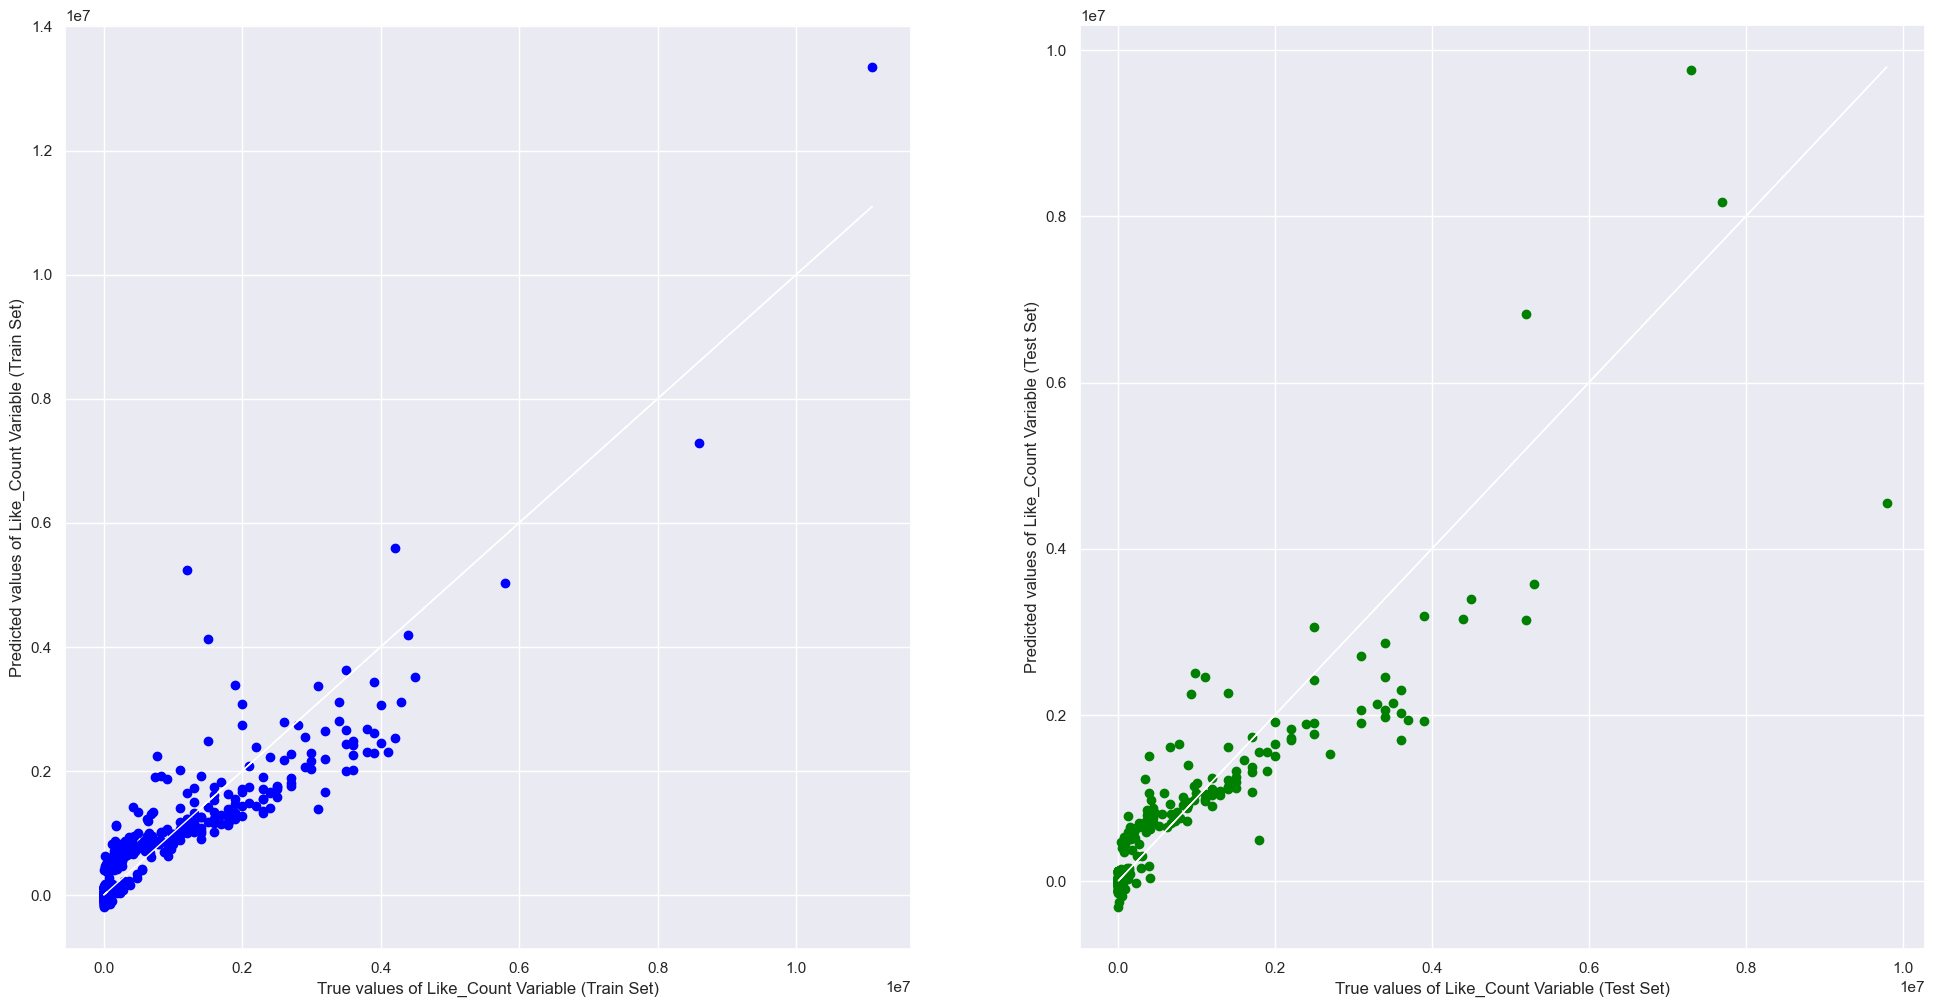

In [75]:
# Linear Regression using Train Data
linreg = LinearRegression()   # create the linear regression object
linreg.fit(X_train, y_train)  # train the linear regression model

# Predict the Like count from predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))

axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of Like_Count Variable (Train Set)")
axes[0].set_ylabel("Predicted values of Like_Count Variable (Train Set)")

axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of Like_Count Variable (Test Set)")
axes[1].set_ylabel("Predicted values of Like_Count Variable (Test Set)")

plt.show()

In [76]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8403116056787311
Mean Squared Error (MSE) 	: 185224370113.0725

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8084473386154963
Mean Squared Error (MSE) 	: 331123110580.0599



An R-squared value of 0.840 and 0.808 for the train and test datasets respectively is high as 84% and 80.8% of data fit well to the regression line.
This shows that the data modelling is accurate in predicting the Like Count based on the respective variables. 
Generally, the R-squared value drop from train to test set is only 0.32 thus the model generally works well, but accuracy can be further improved.

## Decision Tree Model

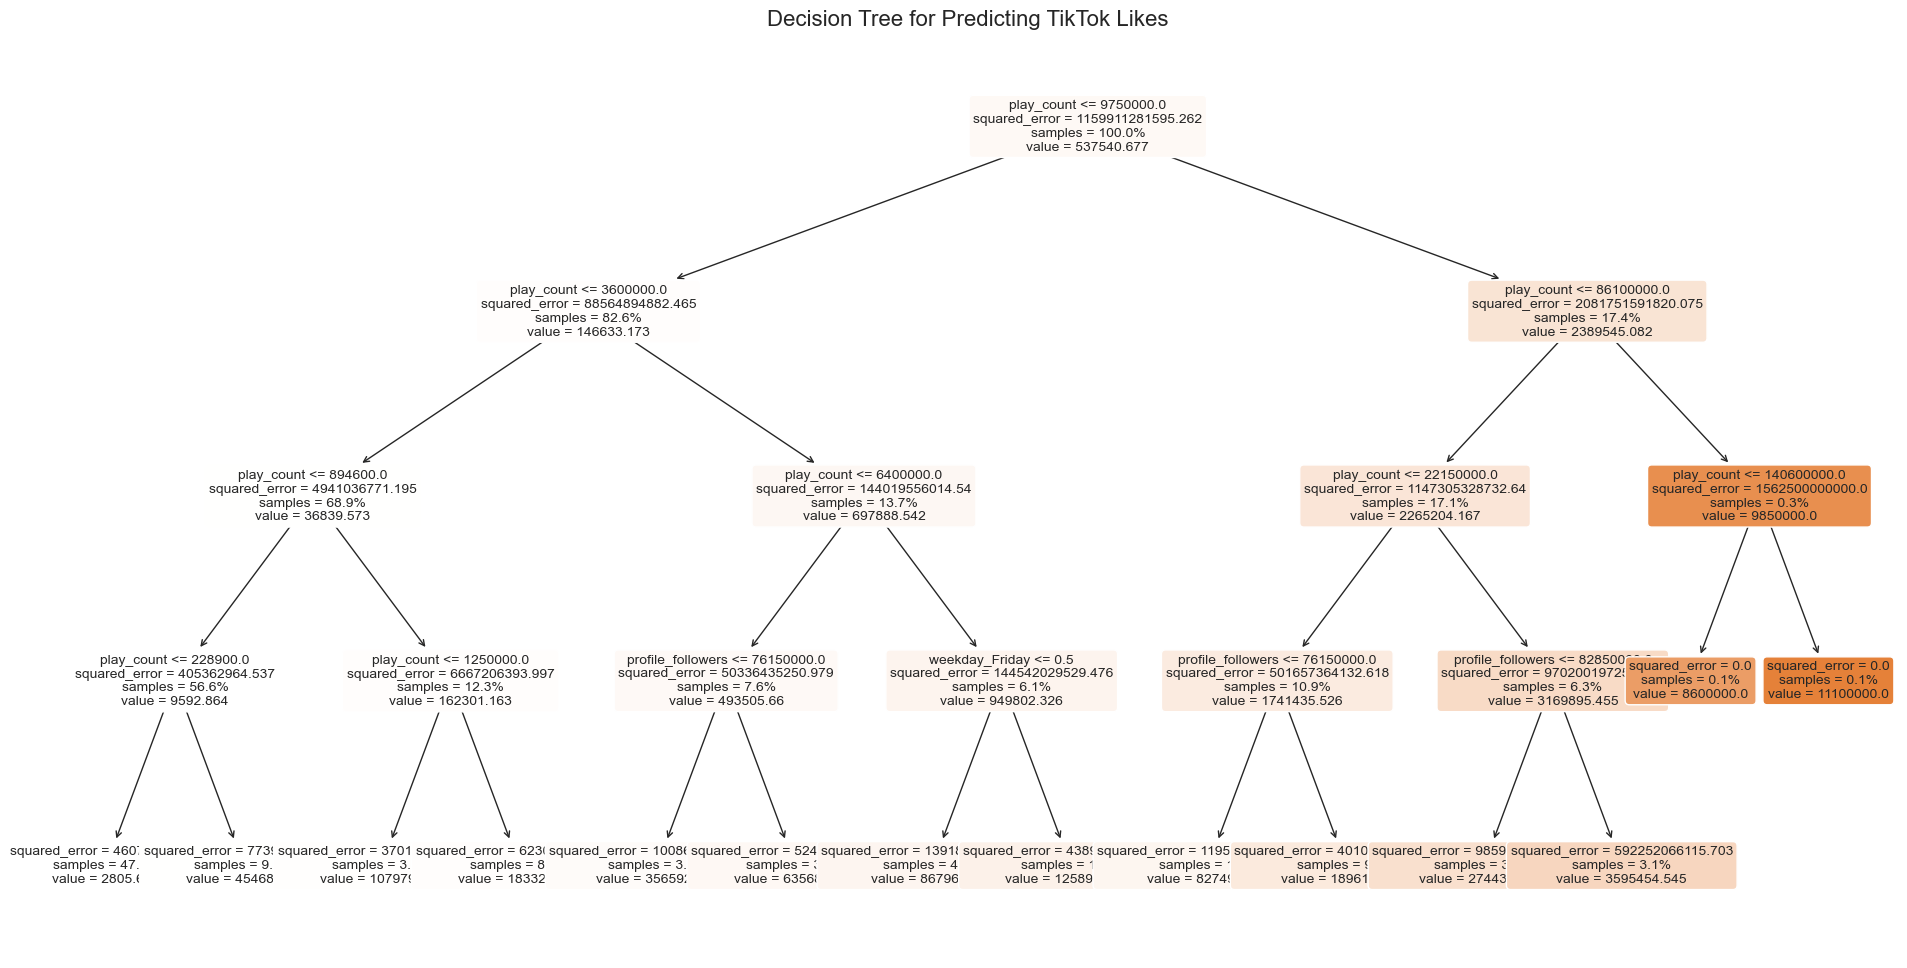

In [77]:
# Import essential models and functions
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

y = df_clean_processed['like_count']  # Target variable
X = df_clean_processed.drop('like_count', axis=1)  # Features

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Decision Tree using Train Data
dectree = DecisionTreeRegressor(max_depth=4, random_state=42)
dectree.fit(X_train, y_train)

# Plot the Decision Tree
plt.figure(figsize=(24, 12))
plot_tree(dectree, 
          filled=True, 
          rounded=True, 
          feature_names=X.columns,  
          proportion=True,
          impurity=True,
          fontsize=10)
plt.title("Decision Tree for Predicting TikTok Likes", fontsize=16)
plt.show()

In [78]:
# Evaluate performance
print("Decision Tree Performance:")
print("Train MSE:", mean_squared_error(y_train, dectree.predict(X_train)))
print("Test MSE:", mean_squared_error(y_test, dectree.predict(X_test)))
print("Train R²:", r2_score(y_train, dectree.predict(X_train)))
print("Test R²:", r2_score(y_test, dectree.predict(X_test)))

Decision Tree Performance:
Train MSE: 99151271382.50406
Test MSE: 422341070992.4348
Train R²: 0.9145182282854096
Test R²: 0.7556783154795168


An R-squared value of 0.915 and 0.756 for the train and test datasets respectively shows that the model performs decently on train data, but not as well as on the test data. The tree explains over 91.5% of the variance of train set, and 75.6% of the test set.  The big gap of more than 0.15 between training and testing suggests some overfitting.


### RandomForest model

In [79]:
from sklearn.model_selection import train_test_split
y = df_clean_processed['like_count']
X = df_clean_processed.drop('like_count', axis=1)

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestRegressor

# Create the Random Forest object
rf = RandomForestRegressor(n_estimators=100, random_state=42,max_depth = 4)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, random_state=42)

In [80]:
# Predictions and evaluation
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

print("\nRandom Forest Performance:")
print("Train MSE: ", mean_squared_error(y_train, y_train_pred_rf))
print("Test MSE: ", mean_squared_error(y_test, y_test_pred_rf))
print("Train R-squared: ", r2_score(y_train, y_train_pred_rf))
print("Test R-squared: ", r2_score(y_test, y_test_pred_rf))


Random Forest Performance:
Train MSE:  83111894773.96848
Test MSE:  340605009054.36633
Train R-squared:  0.9283463346785781
Test R-squared:  0.8029621192825742


An R-squared value of 0.928 and 0.803 for the train and test datasets respectively is high as 92.8% of train data fit well to the regression line and 80.2% of test data fit well to the regression line. 

It also means that the model is performing better compared to the decision tree model. But the gap between training and testing data suggests some overfitting, and the accuracy can be further improved.


### Increase both Number and Depth of Decision Trees in the Forest

To improve our accuracy, we will increase the number and depth of decision trees in the Random Forest. 

Increasing the number of trees increase performance in stability and generalisation, thereby reducing overfitting and improving reliability on unseen data. Increasing depth helps to capture more complicated patterns, improving how well the test data fits into the tree especially when variables have a non-linear relationship. 

In [81]:
from sklearn.ensemble import RandomForestRegressor

# Create the Random Forest object
rf2 = RandomForestRegressor(
    n_estimators=1000,  
    max_depth=5,        
    random_state=42     
)

# Fit the model
rf2.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=1000, random_state=42)

In [82]:
# Predictions and evaluation
y_train_pred_rf2 = rf2.predict(X_train)
y_test_pred_rf2 = rf2.predict(X_test)

print("\nRandom Forest2 Performance:")
print("Train MSE: ", mean_squared_error(y_train, y_train_pred_rf2))
print("Test MSE: ", mean_squared_error(y_test, y_test_pred_rf2))
print("Train R-squared: ", r2_score(y_train, y_train_pred_rf2))
print("Test R-squared: ", r2_score(y_test, y_test_pred_rf2))


Random Forest2 Performance:
Train MSE:  60996548849.74544
Test MSE:  325533627403.1369
Train R-squared:  0.9474127462870652
Test R-squared:  0.8116808198920762


Even though the R-squared for both train and test data are increasing, the gap between the performance on train and test is also increasing. This may be an indication of overfitting the train set.

Therefore, we should try out a basic set of tools for Cross-Validation, so that we can tune the Hyper-parameters of Random Forest, which has the highest prediction accuracy among the machine learning models we have tried so far.

## Using GridSearchCV

Grid search helps us find the best combination of hyperparameters to improve our model accuracy. This enhances model tuning by testing each combination through cross-validation, identifying the set which yields the best performance. 

In [83]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

y = df_clean_processed['like_count']
X = df_clean_processed.drop('like_count', axis=1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}

# Use RandomForestRegressor, not Classifier since we are predicting likes count
hpGrid = GridSearchCV(
    RandomForestRegressor(),
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error', #not accuracy since this is a regression
    n_jobs=-1
)

# Fit the model
hpGrid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error')

In [84]:
# Fetch the best Model or the best set of Hyper-parameters
print(hpGrid.best_estimator_)

# Print the score (accuracy) of the best Model after CV
print(np.abs(hpGrid.best_score_))

RandomForestRegressor(min_samples_split=5, n_estimators=200)
224227701163.36417


### Random Forest through GridSearchCV

In [85]:
# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Extract Response and Predictors
y = pd.DataFrame(df_clean_processed['like_count'])  
X = pd.DataFrame(df_clean_processed.drop('like_count', axis=1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the Random Forest Regressor object
rf3 = RandomForestRegressor(n_estimators=200,   # found using GridSearchCV
                               max_depth=10,       
                               min_samples_split=5, # found using GridSearchCV
                               random_state=42)

# Fit Random Forest on Train Data
rf3.fit(X_train, y_train.values.ravel())

RandomForestRegressor(max_depth=10, min_samples_split=5, n_estimators=200,
                      random_state=42)

In [86]:
# Evaluate Performance
print("Training Performance:")
print("MSE:", mean_squared_error(y_train, rf3.predict(X_train)))
print("R²:", r2_score(y_train, rf3.predict(X_train)))

print("\nTest Performance:")
print("MSE:", mean_squared_error(y_test, rf3.predict(X_test)))
print("R²:", r2_score(y_test, rf3.predict(X_test)))

Training Performance:
MSE: 37133305426.59425
R²: 0.9679860813358728

Test Performance:
MSE: 312685169766.9194
R²: 0.8191135727754134


An R-squared value of 0.968 on the training set and 0.819 on the test set indicates that the model fits the training data very well, but in comparison, the test set still has a lower accuracy. The gap between the R-square value of roughly 1.5 is still quite big, meaning overfitting is still a problem for us to handle.

### Residual analysis

Residual analysis is a tool that we learnt outside of course content. Despite the various machine learning models that we have applied so far, all yielded roughly the same results and our attempts to increase our R squared value did not have much improvements. Thus we use residual analysis to analyse further how the model is deviating from the actual values. This helps us to detect any patterns in the errors and make targeted improvements accordingly. 

In [87]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = df_clean_processed.drop('like_count', axis=1)
y = df_clean_processed['like_count'].values  # Original like counts (no transform)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
model = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    random_state=42
)
model.fit(X_train, y_train)

# Calculate Residuals
train_residual = np.mean(y_train - model.predict(X_train))
test_residual = np.mean(y_test - model.predict(X_test))

print(f"Train Mean Residual: {train_residual:,.2f}")
print(f"Test Mean Residual: {test_residual:,.2f}")


Train Mean Residual: 1,986.92
Test Mean Residual: 14,757.06


We can see that our test data tends to underpredict the like_count.
This can be due to the model struggles with near-zero like counts.
Therefore, we will try to fix this using log transform on the like_count.

### Use Log Transformation on like_count

We used Log Transformation due to the nature of our dataset, which had outliers and values on the extreme end of the categories. As we did not remvoe those outliers, it thus affected our r-squared value. 

Log Transmformation thus helps by compressing large values and stretching small values. This smooths out extreme values for the categories so that our analysis becomes more stable and accurate. 

In [88]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare Data with Log Transform
X = df_clean_processed.drop('like_count', axis=1)
y = np.log1p(df_clean_processed['like_count'])  # Log-transform target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train Random Forest Model
rf4 = RandomForestRegressor(
    n_estimators=200,      # From grid search
    max_depth=10,            
    min_samples_split=5,   # From grid search
    random_state=42,
    n_jobs=-1
)
rf4.fit(X_train, y_train)

# Evaluate Performance
print("Training Performance:")
print("MSE:", mean_squared_error(y_train, rf4.predict(X_train)))
print("R²:", r2_score(y_train, rf4.predict(X_train)))

print("\nTest Performance:")
print("MSE:", mean_squared_error(y_test, rf4.predict(X_test)))
print("R²:", r2_score(y_test, rf4.predict(X_test)))


Training Performance:
MSE: 0.12719960642447847
R²: 0.991907560924377

Test Performance:
MSE: 0.43959278608236235
R²: 0.9743418492469477


An R-squared value of 0.992 on the training set and 0.974 on the test set suggests that the model is capturing the underlying pattern in the data quite well. 99.2% of train data fit well onto the regression line, and 97.4% of test data fit well onto the regression line. The relatively small gap between training and testing performance of 0.018 indicates strong generalization and minimal overfitting, especially compared to earlier models.

# Evaluation of Machine Learning

In this project, we explored and compared three machine learning models —Linear Regression, Decision Tree Regression, and Random Forest Regression— to predict the number of likes TikTok videos receive based on a variety of video and user-related features. While Linear Regression and Decision Trees were covered in class, Random Forest was a new model we chose to explore and implement independently. Across all the machine learning models tested, we observed progressively better performance both in terms of prediction accuracy and generalization.

### Linear Regression
As our baseline model, Linear Regression assumes a linear relationship between features (e.g., video duration, number of followers, verification status) and the target variable (like_count). It’s a simple yet powerful model when the underlying relationships are linear.

### Decision Tree Regression
We then implemented a Decision Tree Regressor with a restricted depth to prevent overfitting. Decision Trees introduce flexibility and allow for modeling of non-linear patterns and conditional relationships.

The increase in test MSE shows that while it captures more complex relationships than Linear Regression, it can still be sensitive to overfitting.

### Random Forest Regression
To reduce the variance and improve predictive power, we explored Random Forest Regression, which builds multiple decision trees and averages their predictions. This ensemble method was not covered in class, making it the model we chose to learn on our own.

Random Forest is well-suited for the real-world complexity of social media data. Likes on TikTok are influenced by a mix of nonlinear, interacting variables—things like user status, day of the week, content length, and follower base—all of which Random Forest can model effectively without the risk of oversimplification.

The results showed that Random Forest significantly outperformed both prior models. It explains 97.6% of the variance in training and retained a high 89.1% R² on the test set, with the lowest test MSE among all models

### Residual Analysis and Log Transform
As part of 2  additional tools that we learnt outside of class, we were finally able to make targeted improvements significantly increase our R-squared value. Log Transformation helped us to increase the accuracy of random forest model in spite of our varied dataset with presence of outliers. With a significantly high r-squared value of 0.992 on the training set and 0.974 on the test set, random forest with log transformation is thus the most accurate model to be used to predict like counts to help companeis adjust their social media marketing. 

# Key Takeaway
Our key takeaway is that : 1. Random Forest outperforms the Decision Tree in all aspects due to its ensemble nature. 2. A small R² gap between training and test suggests good generalization and low risk of overfitting.
3. The log transformation was highly effective for skewed data, improving both accuracy and robustness.
4. Random Forest with Log Transformation will be used for data mdoelling to help companies predict like count of their posts.

# Outcome 

Through our analysis, we gained several key insights:


- **View Count**: We observed that when posts had a higher view, they also tend to have higher likes.

This likely because view count highlights the exposure of the post. With a greater exposure, it is more likely that the post reaches more people which increases the chance that the posts will be liked by more people. However, it is also important that the videos are able to capture engagement as it is a possibility that the post comes across more people but are not liked or entertaining to be liked by viewers.

- **Best Day to Post**: Some weekdays outperformed others, suggesting that audience activity varies throughout the week.

Saturday and Sunday present the best days to post with higher engagement. This is likely due to people having more leisure time on weekends to browse through social media and are more receptive to content. Companies should try to avoid posting on Thursday and Friday as the dataset shows a significantly lower like count. This is likely due to being at the end of the work week when people may feel more tired and busy with work to enjoy social media content. 

- **Video Duration**: Shorter videos (within an optimal duration range) generally led to higher like counts, indicating that viewer attention span might influence performance.

Especially on Tiktok where different content and posts are continuously scrolled through, retaining the attention of the viewer is important. Longer videos may struggle to retain the viewer's attention and if they do not watch the video in full, they are less likely to enagage with the post. Companies will also be unable to fully deliver their marketing when video is not watched fully.


- **Follower Count**: We observed that increasing the number of followers had a strong positive correlation with like counts.

When a post is made by an account with higher follower counts, the post likely will have higher likes. This is likely because such posts have a wider audience reach, allowing the post to be exposed to more users which increases the likelihood of engagement. 

- **Verified Account**: We observed that posts made by verified accounts had higher likes than those from non-verified accounts.

This is likely due to the fact that verification typically signifies authenticity and credibility of account. They are likely to be perceived as more reputable by viewers who tend to view and engage more with their content.

### TikTok Like Count Predictor
We have confidence in Random Forest with Log Transformation, which has the highest accuracy in predicting like count based on the different predictors. Therefore, this is the model that can be used by companies to predict the like count for their posts and help them to improve and amend their social media marketing accordingly. 

### Recommendations

- **View Count**: Companies should also focus on increase exposure of their social media content as part of their social media marketing.

It is important for their content to have a wide reach and be viewed by many different people rather than than being viewed repeatedly by the same poeple. High visibility allows the content to be discovered by new users and the larger the pool of people who sees the content, the more likely people will engage with the post.

- **Best Day to Post**: Companies should try to post their marketing ideally on the weekend.

Reach of a Tiktok post is highest within the first few days of posting, thus this allows for a higher likelihood for more people to view and engage with the content as the weekend has the highest user activity and viewers have more time to view content and engage with them.

- **Video Duration**: Companies should focus on making short videos for their tiktok promotion, ideally less than 20 seconds.

Videos of this length allow companies to have marketing that are short and concise, thus able to retain the attention of viewers for higher likes. 

- **Follower Count**: If the company does not have a Tiktok account, or their Tiktok account is not yet well-established with a relatively low follower count, the company should instead consider having their social media marketing being posted by influencers or celebrities through endorsements or paid promotions.

Typically, social media influencers and celebrities have a pre-existing large and engaged audience following their account. Thus, this increases not only reach, but also engagement as followers of such influencers and celebrities are more easily influenced with the content being posted due to perceived authenticity of the brand being promoted. Depending on the reach and engagement that companies aim to achieve, they should partner with influencers of the respective follower count category. 

- **Verified Account**: Similarly, if the company does not have a Tiktok account, or their Tiktok account is not yet verified, the company should instead consider having their social media marketing being posted by influencers or celebrities through endorsements or paid promotions as such accounts tend to be verified. 
  
### Out of Course Content

To enhance our analysis and predictions, we ventured beyond the course content and implemented several additional tools and techniques:

- **Interactive Web Feature**: Using HTML, we created an interactive component that allows users to input custom values and predictor choices. Based on these inputs, the webpage outputs a predicted like count, offering a hands-on way to explore model predictions dynamically.

- **Log Transformation**: We applied a log transformation to our target variable (likes count) to stabilize variance and improve model performance — a technique not covered in class.

- **Residual Analysis**: We performed residual analysis to evaluate model fit and identify any systematic errors in our predictions.

These explorations allowed us to better understand our model performance and provided a more user-friendly way to interact with our findings.

### Reflections

While machine learning played a central role, the limited size and noisy nature of the data posed some challenges. Simple models such as linear regression performed reasonably well, while more complex models often overfitted or showed marginal gains. This highlighted the importance of model interpretability and simplicity, especially when data is limited.

Critically, we felt that a data set with a larger size would significantly improve the accuracy of our model. The nature of social media which is highly dynamic with millions of posts means that social media marketing and engagement pattern is influenced by various evolving factors. A dataset of only 1000 rows is merely enough to capture accurately the full spectrum of how different factors affect engagement. 

Hence, to have a more beneficial analysis, we could increase our dataset to include data from other social media platforms such as Instagram. TikTok may be one of the fastest growing platforms, but other social media platforms continue to be an important avenue for social media marketing. Analysing how the different factors influence engagement on the respective platforms could result in a more comprehensive analysis and understanding that would greatly benefit companies in improving engagement for their social media marketing.

### Roles and Responsibilities

- **Ruiyang** was in charge of the machine learning components and implemented the interactive prediction feature on the webpage.
- **Lily** carried out exploratory data analysis (EDA) and took the lead in cleaning and preparing the dataset for modeling.
- **Jingping** defined the problem statement, structured the overall project direction, and created the final presentation slides.
